In [1]:
import sys
sys.path.insert(0, '../Main')#set the library path as sys path
import model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
OnlineData = model.DATA(ReadALLSubjs=False,SplitData=True)

In [3]:
OnlineData.scandata(Subj=[1])
OnlineData.stackdata(ChooseSensors=['IMU'])

Scaning the AB185 subject is done.
30 channels of ['IMU'] data are selected:
Start stacking data...(Split data into train set and val set), and split ratio is  0.33
Finish stacking data of the 1 subjects: 52 trails
Done stacking data! 
Train dataset: (806884, 30) 
Val dataset: (389554, 30)


In [4]:
OnlineData.PreprocessData(Preprocess='AbsMax')

The preprocess method is AbsMax
.
..
...
Preprocess is done


In [5]:
OnlineData.displayConfig()


Configuration:
CHOOSEDCHANNELS                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
DATAPATH                       C:\Users\Zed_Luz\OneDrive - 南方科技大学\BigScaleFiles\1-datasets for bilateral lower limb neuromechanical signals\2-Data
DataType                       ['Features', 'MVC', 'Processed', 'Raw']
INDEX_EMG                      [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
INDEX_GONIO                    [44, 45, 46, 47, 48, 49, 50, 51]
INDEX_IMU                      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
IfReadAll                      False
IfSplitData                    True
LABELCATEGORIES                ['Sitting', 'Level Ground Walking', 'Ramp Ascent', 'Ramp Descent', 'Stair Ascent', 'Stair Descent', 'Standing']
LEARNING_RATE                  0.001
MAXABS_PREPROCESS              False
SCANEDSubjects                 [1]
SPILT

Illustate  30 channels of data...


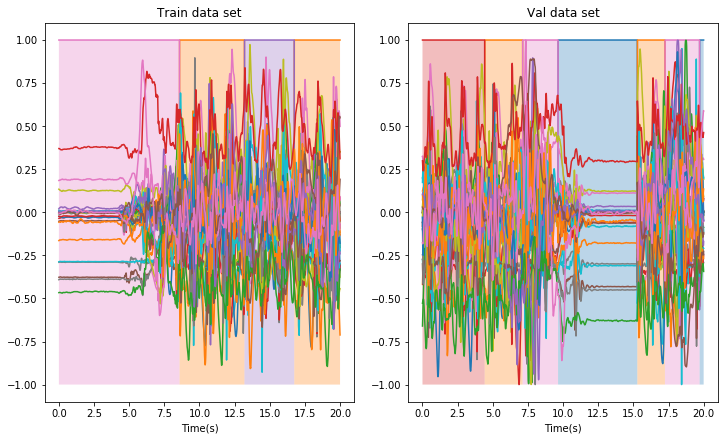

In [6]:
OnlineData.displaydata()

In [7]:
OnlineData.PrepareCNNdataset()
OnlineData.TRAIN_DATA_all.shape

The dataset for CNN is prepared 
whose shape of train set is (16137, 100, 30, 1) 
whose shape of val set is (7791, 100, 30, 1)


(16137, 100, 30, 1)

### CNNs model1

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
cnn_model1 = Sequential()
cnn_model1.add(Conv2D(filters=50,
                      kernel_size=(5,1),
                      input_shape=(OnlineData.WINDOW_SIZE, OnlineData.TRAIN_DATA_all.shape[2], 1),
                      data_format='channels_last',
                      activation='relu',
                      padding='valid'
                     ))
cnn_model1.add(MaxPooling2D(pool_size=(2, 1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model1.add(Dropout(0.5))
cnn_model1.add(Conv2D(filters=50,
                      kernel_size=(5,1),
                      input_shape=cnn_model1.output_shape[1:4],
                      data_format='channels_last',
                      activation='relu',
                      padding='valid'
                      ))
cnn_model1.add(MaxPooling2D(pool_size=(2,1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model1.add(Dropout(0.5))
cnn_model1.add(Conv2D(filters=40,
                     kernel_size=(5,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     activation='relu',
                     padding='valid'
                     ))
cnn_model1.add(MaxPooling2D(pool_size=(2,1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model1.add(Dropout(0.5))
cnn_model1.add(Conv2D(filters=40,
                     kernel_size=(3,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     activation='relu',
                     padding='valid'
                     ))
cnn_model1.add(MaxPooling2D(pool_size=(2,1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model1.add(Conv2D(filters=40,
                     kernel_size=(3,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     activation='relu',
                     padding='valid'
                     ))
cnn_model1.add(Conv2D(filters=400,
                     kernel_size=(1,cnn_model1.output_shape[2]),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     activation='relu',
                     padding='valid'
                     ))
cnn_model1.add(Dropout(0.5))
cnn_model1.add(Flatten())
cnn_model1.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],
                     activation='softmax'
                     ))
cnn_model1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
cnn_model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 96, 30, 50)        300       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 30, 50)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 30, 50)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 44, 30, 50)        12550     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 30, 50)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 22, 30, 50)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 18, 30, 40)        10040     
__________

In [16]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=2,restore_best_weights=True)
CNN1281525612=cnn_model1.fit(OnlineData.TRAIN_DATA_all,
                             OnlineData.TRAIN_LABEL_all,
                             epochs=10,
                             batch_size=128,
                             validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all),
                            callbacks = [earlystop])
cnn_model1.save('../ModelLogs/CNN-400.h5')

Train on 16137 samples, validate on 7791 samples
Epoch 1/10
16137/16137 [==============================] - 176s 11ms/step - loss: 0.8892 - acc: 0.6582 - val_loss: 2.3507 - val_acc: 0.5546
Epoch 2/10
16137/16137 [==============================] - 172s 11ms/step - loss: 0.4725 - acc: 0.8265 - val_loss: 2.6976 - val_acc: 0.5614
Epoch 3/10
16137/16137 [==============================] - 185s 11ms/step - loss: 0.3491 - acc: 0.8769 - val_loss: 2.5548 - val_acc: 0.5840


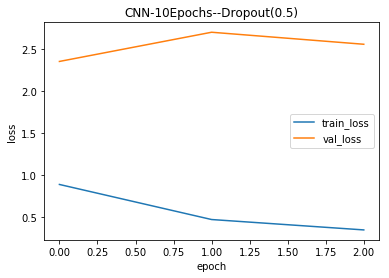

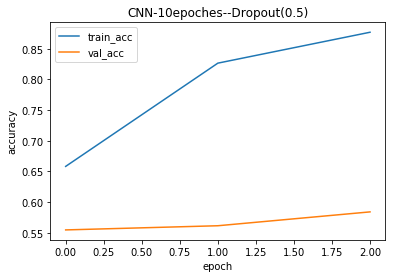

In [17]:
Figloss = plt.figure(1)
plt.plot(CNN1281525612.history['loss'], label='train_loss')
plt.plot(CNN1281525612.history['val_loss'], label='val_loss')
plt.title('CNN-10Epochs--Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show(Figloss)
FigAcc = plt.figure(2)
plt.plot(CNN1281525612.history['acc'], label='train_acc')
plt.plot(CNN1281525612.history['val_acc'],label='val_acc')
plt.title('CNN-10epoches--Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show(FigAcc)

## CNNs Model2

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
adam = Adam(lr=0.0001)
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(filters=50,
                      kernel_size=(5,1),
                      input_shape=(OnlineData.WINDOW_SIZE, OnlineData.TRAIN_DATA_all.shape[2], 1),
                      data_format='channels_last',
                      activation='relu',
                      padding='valid'
                     ))
cnn_model2.add(MaxPooling2D(pool_size=(2, 1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model2.add(Dropout(0.5))
cnn_model2.add(Conv2D(filters=50,
                      kernel_size=(5,1),
                      input_shape=cnn_model1.output_shape[1:4],
                      data_format='channels_last',
                      activation='relu',
                      padding='valid'
                      ))
cnn_model2.add(MaxPooling2D(pool_size=(2,1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model2.add(Dropout(0.5))
cnn_model2.add(Conv2D(filters=40,
                     kernel_size=(5,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     activation='relu',
                     padding='valid'
                     ))
cnn_model2.add(MaxPooling2D(pool_size=(2,1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model2.add(Dropout(0.5))
cnn_model2.add(Conv2D(filters=40,
                     kernel_size=(3,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     activation='relu',
                     padding='valid'
                     ))
cnn_model2.add(MaxPooling2D(pool_size=(2,1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model2.add(Conv2D(filters=40,
                     kernel_size=(3,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     activation='relu',
                     padding='valid'
                     ))
cnn_model2.add(Dropout(0.5))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],
                     activation='softmax'
                     ))
cnn_model2.compile(optimizer=adam,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
cnn_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 96, 30, 50)        300       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 48, 30, 50)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 48, 30, 50)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 44, 30, 50)        12550     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 22, 30, 50)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 22, 30, 50)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 18, 30, 40)        10040     
__________

In [26]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=2,restore_best_weights=True)
CNN1281525612=cnn_model2.fit(OnlineData.TRAIN_DATA_all,
                             OnlineData.TRAIN_LABEL_all,
                             epochs=10,
                             batch_size=128,
                             validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all),
                            callbacks = [earlystop])
cnn_model2.save('../ModelLogs/CNN-without-400.h5')

Train on 16137 samples, validate on 7791 samples
Epoch 1/10
16137/16137 [==============================] - 167s 10ms/step - loss: 1.7424 - acc: 0.3532 - val_loss: 1.8201 - val_acc: 0.2540
Epoch 2/10
16137/16137 [==============================] - 163s 10ms/step - loss: 1.3410 - acc: 0.5308 - val_loss: 1.6177 - val_acc: 0.4939
Epoch 3/10
16137/16137 [==============================] - 159s 10ms/step - loss: 1.0955 - acc: 0.5816 - val_loss: 1.7034 - val_acc: 0.5037
Epoch 4/10
16137/16137 [==============================] - 155s 10ms/step - loss: 1.0129 - acc: 0.6059 - val_loss: 1.7642 - val_acc: 0.5114


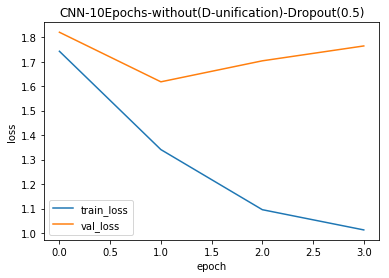

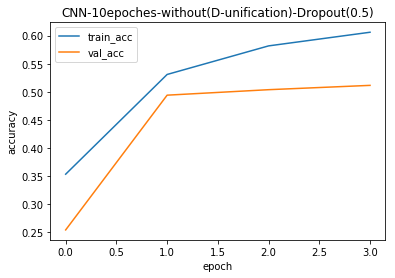

In [27]:
Figloss = plt.figure(1)
plt.plot(CNN1281525612.history['loss'], label='train_loss')
plt.plot(CNN1281525612.history['val_loss'], label='val_loss')
plt.title('CNN-10Epochs-without(D-unification)-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show(Figloss)
FigAcc = plt.figure(2)
plt.plot(CNN1281525612.history['acc'], label='train_acc')
plt.plot(CNN1281525612.history['val_acc'],label='val_acc')
plt.title('CNN-10epoches-without(D-unification)-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show(FigAcc)

## CNNs Model3

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
adam = Adam(lr=0.0001)
cnn_model3 = Sequential()
cnn_model3.add(Conv2D(filters=50,
                      kernel_size=(9,1),
                      input_shape=(OnlineData.WINDOW_SIZE, OnlineData.TRAIN_DATA_all.shape[2], 1),
                      data_format='channels_last',
                      activation='relu',
                      padding='valid'
                     ))
cnn_model3.add(MaxPooling2D(pool_size=(2, 1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model3.add(Dropout(0.5))
cnn_model3.add(Conv2D(filters=40,
                     kernel_size=(9,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     activation='relu',
                     padding='valid'
                     ))
cnn_model3.add(MaxPooling2D(pool_size=(2,1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model3.add(Dropout(0.5))
cnn_model3.add(Conv2D(filters=20,
                     kernel_size=(9,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     activation='relu',
                     padding='valid'
                     ))
cnn_model3.add(MaxPooling2D(pool_size=(2,1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model3.add(Dropout(0.5))
cnn_model3.add(Conv2D(filters=20,
                     kernel_size=(5,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     activation='relu',
                     padding='valid'
                     ))
cnn_model3.add(Flatten())
cnn_model3.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],
                     activation='softmax'
                     ))
cnn_model3.compile(optimizer=adam,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
cnn_model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 92, 30, 50)        500       
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 46, 30, 50)        0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 46, 30, 50)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 38, 30, 40)        18040     
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 19, 30, 40)        0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 19, 30, 40)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 11, 30, 20)        7220      
__________

In [46]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=2,restore_best_weights=True)
CNN1281525612=cnn_model3.fit(OnlineData.TRAIN_DATA_all,
                             OnlineData.TRAIN_LABEL_all,
                             epochs=10,
                             batch_size=128,
                             validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all),
                            callbacks = [earlystop])
cnn_model3.save('../ModelLogs/CNN-9-9-9-without-400.h5')

Train on 16137 samples, validate on 7791 samples
Epoch 1/10
16137/16137 [==============================] - 161s 10ms/step - loss: 1.7027 - acc: 0.3884 - val_loss: 1.7698 - val_acc: 0.3736
Epoch 2/10
16137/16137 [==============================] - 169s 10ms/step - loss: 1.3283 - acc: 0.5476 - val_loss: 1.7884 - val_acc: 0.4707
Epoch 3/10
16137/16137 [==============================] - 176s 11ms/step - loss: 1.0618 - acc: 0.5897 - val_loss: 2.1522 - val_acc: 0.4469


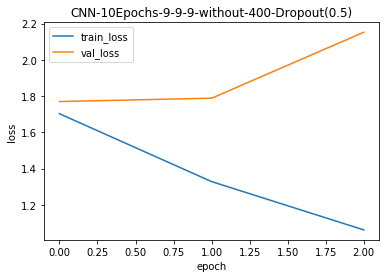

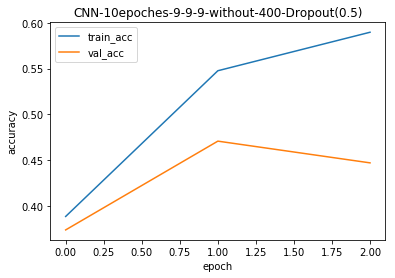

In [47]:
Figloss = plt.figure(1)
plt.plot(CNN1281525612.history['loss'], label='train_loss')
plt.plot(CNN1281525612.history['val_loss'], label='val_loss')
plt.title('CNN-10Epochs-9-9-9-without-400-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show(Figloss)
FigAcc = plt.figure(2)
plt.plot(CNN1281525612.history['acc'], label='train_acc')
plt.plot(CNN1281525612.history['val_acc'],label='val_acc')
plt.title('CNN-10epoches-9-9-9-without-400-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show(FigAcc)

## CNNs Model4

In [53]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam
adam = Adam(lr=0.0001)
cnn_model4 = Sequential()
cnn_model4.add(Conv2D(filters=50,
                      kernel_size=(9,1),
                      input_shape=(OnlineData.WINDOW_SIZE, OnlineData.TRAIN_DATA_all.shape[2], 1),
                      data_format='channels_last',
                      padding='valid'
                     ))
cnn_model4.add(BatchNormalization())
cnn_model4.add(LeakyReLU())
cnn_model4.add(MaxPooling2D(pool_size=(2, 1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model4.add(Dropout(0.5))
cnn_model4.add(Conv2D(filters=40,
                     kernel_size=(9,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     padding='valid'
                     ))
cnn_model4.add(BatchNormalization())
cnn_model4.add(LeakyReLU())
cnn_model4.add(MaxPooling2D(pool_size=(2,1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model4.add(Dropout(0.5))
cnn_model4.add(Conv2D(filters=20,
                     kernel_size=(9,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     padding='valid'
                     ))
cnn_model4.add(BatchNormalization())
cnn_model4.add(LeakyReLU())
cnn_model4.add(MaxPooling2D(pool_size=(2,1),
                            padding='valid',
                            data_format='channels_last'
                           ))
cnn_model4.add(Dropout(0.5))
cnn_model4.add(Conv2D(filters=20,
                     kernel_size=(5,1),
                     input_shape=cnn_model1.output_shape[1:4],
                     data_format='channels_last',
                     padding='valid'
                     ))
cnn_model4.add(BatchNormalization())
cnn_model4.add(LeakyReLU())
cnn_model4.add(Flatten())
cnn_model4.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],
                     activation='softmax'
                     ))
cnn_model4.compile(optimizer=adam,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
cnn_model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 92, 30, 50)        500       
_________________________________________________________________
batch_normalization_5 (Batch (None, 92, 30, 50)        200       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 92, 30, 50)        0         
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 46, 30, 50)        0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 46, 30, 50)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 38, 30, 40)        18040     
_________________________________________________________________
batch_normalization_6 (Batch (None, 38, 30, 40)        160       
__________

In [54]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=7,restore_best_weights=True)
CNN1281525612=cnn_model4.fit(OnlineData.TRAIN_DATA_all,
                             OnlineData.TRAIN_LABEL_all,
                             epochs=100,
                             batch_size=128,
                             validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all),
                            callbacks = [earlystop])
cnn_model4.save('../ModelLogs/CNN-9-9-9-LeakyRelu-BN-without-400.h5')

Train on 16137 samples, validate on 7791 samples
Epoch 1/100
16137/16137 [==============================] - 479s 30ms/step - loss: 1.8412 - acc: 0.3253 - val_loss: 1.5104 - val_acc: 0.4766
Epoch 2/100
16137/16137 [==============================] - 431s 27ms/step - loss: 1.4385 - acc: 0.5041 - val_loss: 1.3384 - val_acc: 0.4770
Epoch 3/100
16137/16137 [==============================] - 449s 28ms/step - loss: 1.2147 - acc: 0.5575 - val_loss: 1.3104 - val_acc: 0.4775
Epoch 4/100
16137/16137 [==============================] - 440s 27ms/step - loss: 1.0765 - acc: 0.5909 - val_loss: 1.3360 - val_acc: 0.4696
Epoch 5/100
16137/16137 [==============================] - 433s 27ms/step - loss: 0.9891 - acc: 0.6105 - val_loss: 1.3568 - val_acc: 0.4698
Epoch 6/100
16137/16137 [==============================] - 435s 27ms/step - loss: 0.9199 - acc: 0.6336 - val_loss: 1.3954 - val_acc: 0.4918
Epoch 7/100
16137/16137 [==============================] - 446s 28ms/step - loss: 0.8754 - acc: 0.6470 - val_lo

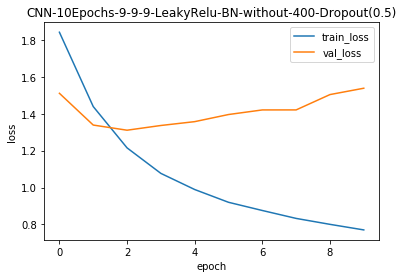

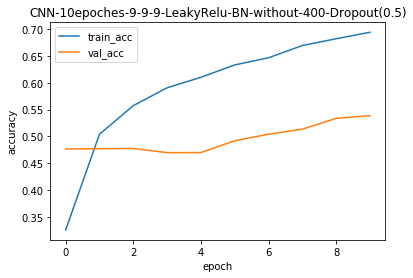

In [57]:
Figloss = plt.figure(1)
plt.plot(CNN1281525612.history['loss'], label='train_loss')
plt.plot(CNN1281525612.history['val_loss'], label='val_loss')
plt.title('CNN-10Epochs-9-9-9-LeakyRelu-BN-without-400-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show(Figloss)
FigAcc = plt.figure(2)
plt.plot(CNN1281525612.history['acc'], label='train_acc')
plt.plot(CNN1281525612.history['val_acc'],label='val_acc')
plt.title('CNN-10epoches-9-9-9-LeakyRelu-BN-without-400-Dropout(0.5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show(FigAcc)